### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
#Import all the necessary packages:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file as reviews.
reviews=pd.read_csv('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 3/Module 3 Assignment/LSE_DA301_assignment_files/turtle_reviews.csv')

# View the DataFrame.
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Change type of product to object (Refers to product code should not be aggregated)
reviews[['product']]=reviews[['product']].astype(object)
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                    object
review                     object
summary                    object
dtype: object

In [4]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points
count  2000.000000        2000.000000             2000.000000     2000.000000
mean     39.495000          48.079060               50.000000     1578.032000
std      13.573212          23.123984               26.094702     1283.239705
min      17.000000          12.300000                1.000000       25.000000
25%      29.000000          30.340000               32.000000      772.000000
50%      38.000000          47.150000               50.000000     1276.000000
75%      49.000000          63.960000               73.000000     1751.250000
max      72.000000         112.340000               99.000000     6847.000000

## 2. Drop columns

In [5]:
# Drop unnecessary columns.
reviews2=reviews.drop(['language','platform'], axis=1)

# View column names.
reviews2.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education product                                             review  \
0  graduate     453  When it comes to a DM's screen, the space on t...   
1  graduate     466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate     254  Nice art, nice printing.  Why two panels are f...   
3  graduate     263  Amazing buy! Bought it as a gift for our new d...   
4  graduate     291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 3. Rename columns

In [6]:
# Rename the column headers.
reviews2.rename(columns={'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace = True)
# View column names.
reviews2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

  product                                             review  \
0     453  When it comes to a DM's screen, the space on t...   
1     466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     254  Nice art, nice printing.  Why two panels are f...   
3     263  Amazing buy! Bought it as a gift for our new d...   
4     291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## Removing outliers (Further Explore)

<AxesSubplot:>

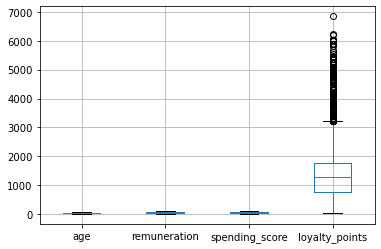

In [7]:
# Import necessary libraries
import seaborn as sns

# View outliers with box plot
reviews2.boxplot()

Outliers only for loyalty_points.

In [8]:
# Finding quartiles
percentile25 = reviews2['loyalty_points'].quantile(0.25)
percentile75 = reviews2['loyalty_points'].quantile(0.75)

In [9]:
# Finding upper and lower limit
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [10]:
# Finding outliers (Above upper limit, from the box plot we know there is not outliers below lower limit)
reviews2[reviews2['loyalty_points'] > upper_limit]

gender  age  remuneration  spending_score  loyalty_points     education  \
123     Male   39         56.58              91            3634      graduate   
127     Male   38         58.22              95            3866  postgraduate   
141     Male   34         61.50              93            3808      graduate   
143   Female   34         62.32              87            3610      graduate   
145     Male   32         63.14              97            3954         Basic   
...      ...  ...           ...             ...             ...           ...   
1984  Female   39         84.46              69            4114           PhD   
1986  Female   53         92.66              91            6232  postgraduate   
1993  Female   38         84.46              85            5019      graduate   
1995  Female   37         84.46              69            4031           PhD   
1997    Male   34         92.66              91            5614      graduate   

     product                                             review  \
123     5510  This book is small in size and probably best f...   
127     2849  ... In a little package. My 6 year old loved m...   
141     4477  My son is 5 and LOVES robots. He likes to chan...   
143     2795  My one-year-old got this as a birthday present...   
145     2811  This is a poorly put together piece of junk. W...   
...      ...                                                ...   
1984     263  Yes, you can find obscure short words to use i...   
1986     977  Love playing Quiddler and this dictionary help...   
1993     263                                               Gift   
1995     977  The perfect word game for mixed ages (with Mom...   
1997    1012  Great game for all.........\nKeeps the mind ni...   

                                                summary  
123                                      Small sized...  
127                                      Lots of fun...  
141                                         robot lover  
143                                Doesn't hold up well  
145                                                Junk  
...                                                 ...  
1984  Quiddler is much more fun to me just using com...  
1986                                   Great Dictionary  
1993                                               Gift  
1995     The perfect word game for mixed ages (with Mom  
1997                                         Great Game  

[266 rows x 9 columns]

In [11]:
# Trim outliers and save them as new df
reviews_nooutlier = reviews2[reviews2['loyalty_points'] < upper_limit]
reviews_nooutlier.shape

(1734, 9)

In [12]:
# Summary of basic descriptive statistics
reviews_nooutlier.describe()

age  remuneration  spending_score  loyalty_points
count  1734.000000   1734.000000     1734.000000     1734.000000
mean     39.949250     43.692191       44.691465     1156.132065
std      14.231244     21.049875       23.702960      683.033448
min      17.000000     12.300000        1.000000       25.000000
25%      29.000000     27.060000       27.000000      697.250000
50%      38.000000     44.280000       47.000000     1160.000000
75%      49.000000     57.400000       59.000000     1504.000000
max      72.000000    112.340000       99.000000     3218.000000

## 4. Save the DataFrame as a CSV file

In [13]:
# Create a CSV file as output.
reviews2.to_csv('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 3/Module 3 Assignment/LSE_DA301_assignment_files/turtle_reviews_clean.csv')

In [14]:
# Import new CSV file with Pandas.
reviews_clean=pd.read_csv ('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 3/Module 3 Assignment/LSE_DA301_assignment_files/turtle_reviews_clean.csv')

# View DataFrame.
reviews_clean.head()

Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0           0    Male   18         12.30              39             210   
1           1    Male   23         12.30              81             524   
2           2  Female   22         13.12               6              40   
3           3  Female   25         13.12              77             562   
4           4  Female   33         13.94              40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [15]:
# Create a CSV file with no outliers
reviews_nooutlier.to_csv('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 3/Module 3 Assignment/LSE_DA301_assignment_files/turtle_reviews_clean_withoutoutliers.csv')

In [16]:
# Import new CSV file with Pandas. (Version without outliers)
reviews_clean2=pd.read_csv ('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 3/Module 3 Assignment/LSE_DA301_assignment_files/turtle_reviews_clean_withoutoutliers.csv')

# View DataFrame.
reviews_clean2.head()

Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0           0    Male   18         12.30              39             210   
1           1    Male   23         12.30              81             524   
2           2  Female   22         13.12               6              40   
3           3  Female   25         13.12              77             562   
4           4  Female   33         13.94              40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression (With Clean Dataset)

<Figure size 432x288 with 0 Axes>

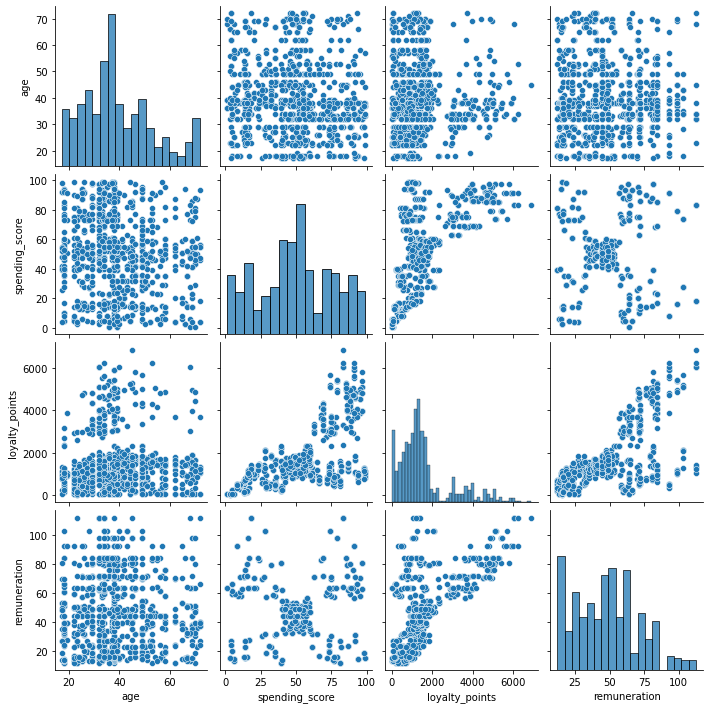

In [17]:
#Check relationship with pair plot before regrassion analysis
#Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.pairplot(reviews_clean, vars=['age', 'spending_score', 'loyalty_points', 'remuneration'])
plt.show()

### 5a) spending vs loyalty

In [18]:
# Independent variable.
x = reviews_clean['spending_score']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f='y~x'
test=ols(f, data=reviews_clean).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        16:15:14   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
#Create the linear equation
y_pred=33.0617*x-75.0527

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

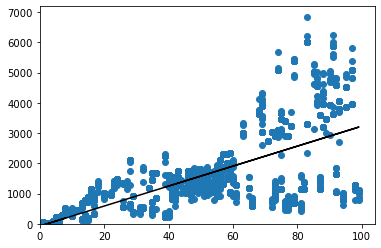

In [21]:
# Plot the graph with a regression line.
#Plot the data points
plt.scatter(x,y)

#Plot regression line (black)
plt.plot(x,y_pred,color='black')

#Set the x and y limits on axes
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5b) renumeration vs loyalty

In [22]:
# Independent variable.
x = reviews_clean['remuneration']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f='y~x'
test=ols(f, data=reviews_clean).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        16:15:15   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [24]:
# Set the X coefficient and the constant to generate the regression table.
#Create the linear equation
y_pred=34.187825*x-65.686513

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

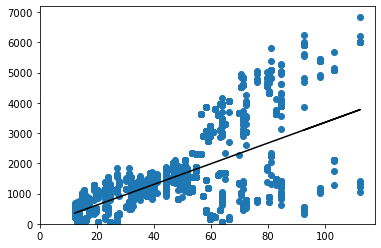

In [25]:
# Plot the graph with a regression line.
#Plot the data points
plt.scatter(x,y)

#Plot regression line (black)
plt.plot(x,y_pred,color='black')

#Set the x and y limits on axes
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5c) age vs loyalty

In [26]:
# Independent variable.
x = reviews_clean['age']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f='y~x'
test=ols(f, data=reviews_clean).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 09 Sep 2022   Prob (F-statistic):             0.0577
Time:                        16:15:15   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [28]:
# Set the X coefficient and the constant to generate the regression table.
#Create the linear equation
y_pred=-4.012805*x+1736.517739

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

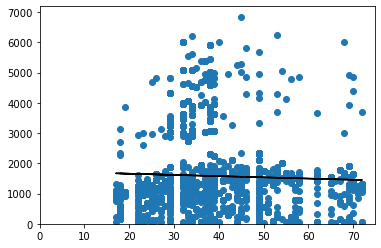

In [29]:
# Plot the graph with a regression line.
#Plot the data points
plt.scatter(x,y)

#Plot regression line (black)
plt.plot(x,y_pred,color='black')

#Set the x and y limits on axes
plt.xlim(0)
plt.ylim(0)
plt.show()

## 5. Linear regression (With Clean & No Outlier Dataset)

<Figure size 432x288 with 0 Axes>

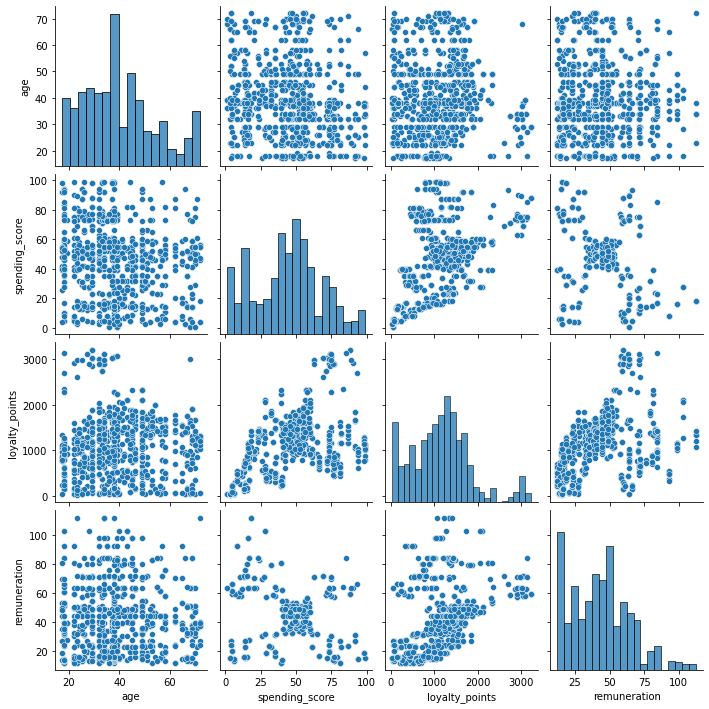

In [30]:
#Check relationship with pair plot before regrassion analysis
#Import necessary l;ibraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.pairplot(reviews_clean2, vars=['age', 'spending_score', 'loyalty_points', 'remuneration'])
plt.show()

### 5a) spending vs loyalty

In [31]:
# Independent variable.
x = reviews_clean2['spending_score']

# Dependent variable.
y = reviews_clean2['loyalty_points']

# OLS model and summary.
f='y~x'
test=ols(f, data=reviews_clean2).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     741.8
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          2.94e-136
Time:                        16:15:18   Log-Likelihood:                -13468.
No. Observations:                1734   AIC:                         2.694e+04
Df Residuals:                    1732   BIC:                         2.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    450.9021     29.307     15.385      0.000     393.421     508.384
x             15.7800      0.579     27.237      0.000      14.644      16.916
==============================================================================
Omnibus:                       51.429   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.291
Skew:                           0.428   Prob(JB):                     9.86e-13
Kurtosis:                       3.180   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Set the X coefficient and the constant to generate the regression table.
#Create the linear equation
y_pred=15.7800*x+450.9021

# View the output.
y_pred

0       1066.3221
1       1729.0821
2        545.5821
3       1665.9621
4       1082.1021
          ...    
1729     719.1621
1730     813.8421
1731     577.1421
1732     703.3821
1733     577.1421
Name: spending_score, Length: 1734, dtype: float64

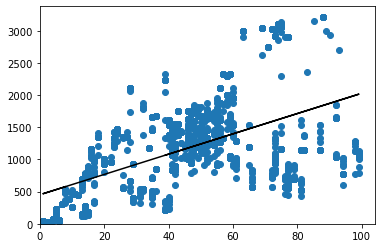

In [33]:
# Plot the graph with a regression line.
#Plot the data points
plt.scatter(x,y)

#Plot regression line (black)
plt.plot(x,y_pred,color='black')

#Set the x and y limits on axes
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5b) renumeration vs loyalty

In [34]:
# Independent variable.
x = reviews_clean2['remuneration']

# Dependent variable.
y = reviews_clean2['loyalty_points']

# OLS model and summary.
f='y~x'
test=ols(f, data=reviews_clean2).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     345.3
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           1.99e-70
Time:                        16:15:19   Log-Likelihood:                -13619.
No. Observations:                1734   AIC:                         2.724e+04
Df Residuals:                    1732   BIC:                         2.725e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    578.1120     34.526     16.744      0.000     510.395     645.829
x             13.2294      0.712     18.582      0.000      11.833      14.626
==============================================================================
Omnibus:                       49.776   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.880
Skew:                           0.352   Prob(JB):                     9.93e-14
Kurtosis:                       3.578   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5b) age vs loyalty

In [35]:
# Independent variable.
x = reviews_clean2['age']

# Dependent variable.
y = reviews_clean2['loyalty_points']

# OLS model and summary.
f='y~x'
test=ols(f, data=reviews_clean2).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.202
Date:                Fri, 09 Sep 2022   Prob (F-statistic):             0.0737
Time:                        16:15:19   Log-Likelihood:                -13775.
No. Observations:                1734   AIC:                         2.755e+04
Df Residuals:                    1732   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1073.7676     48.861     21.976      0.000     977.935    1169.600
x              2.0617      1.152      1.789      0.074      -0.198       4.322
==============================================================================
Omnibus:                      144.941   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.128
Skew:                           0.692   Prob(JB):                     4.25e-43
Kurtosis:                       3.887   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing outliers did not increase R squared values but decreased them. (Remember Rsquared shows how effective is independent variable to explain dependent variable if others remain same). Therefore I kept using my original dataset including outliers.

## Further Explore: Multiple Linear regression (With Clean Dataset)

In [36]:
# Define the dependent variable.
y = reviews_clean['loyalty_points']

# Define the independent variable.
X = reviews_clean[['age', 'remuneration', 'spending_score']] 

In [37]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [38]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.8399114912748795
Intercept:  -2203.059751307901
Coefficients:


[('age', 11.060658711843349),
 ('remuneration', 34.00838549260249),
 ('spending_score', 34.18319657763366)]

In [39]:
# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:15:19   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.0598     52.361    -42.

Multiple linear regression seems to be a good option to predict loyalty points. 84% of the loyalty points can be explained with combination of age, remunaration and sepending score.

In [40]:
# Lets drop independent variable age from the model and check whether there is an improvement in model
# Define the dependent variable.
y = reviews_clean['loyalty_points']

# Define the independent variable.
X = reviews_clean[['remuneration', 'spending_score']] 

In [41]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [42]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.826913470198926
Intercept:  -1700.305097014438
Coefficients:


[('remuneration', 33.97949882180283), ('spending_score', 32.892694687821006)]

In [43]:
# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     4770.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:15:19   Log-Likelihood:                -15398.
No. Observations:                2000   AIC:                         3.080e+04
Df Residuals:                    1997   BIC:                         3.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3051     35.740    -47.

R-squared decreased when we exclude Age from the model. Lets further explore regression model outcome with clean_no outlier data.

## Further Explore: Multiple Linear regression (With Clean and No Outlier Dataset)

In [44]:
# Define the dependent variable.
y = reviews_clean2['loyalty_points']

# Define the independent variable.
X = reviews_clean2[['age', 'remuneration', 'spending_score']] 

In [45]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [46]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.7253178641193181
Intercept:  -1205.5833304764747
Coefficients:


[('age', 9.216669277537274),
 ('remuneration', 21.716394228218995),
 ('spending_score', 23.375369702197787)]

R-squared smaller than other version (data  with outliers)
Therefore decided to move further with clean but inclusive of outlier data.

## 6. Observations and insights

***Loyalty points have a positive correlation with renumaration and spending score. Data is linear for those 2. However age does not have clear correlation. Data is not lineer. Simple linear regression analysis between age and loyalty points gives poor fit.
It is better to move forward with multiple linear regression model. Lineer regression model has the highest R-squared value once all independent variables (renumaration, sepending score and age) included. Age has an incremental effect of only 1%.***

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [47]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [48]:
# Load the CSV file(s) as df2.
df2=pd.read_csv ('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 3/Module 3 Assignment/LSE_DA301_assignment_files/turtle_reviews_clean.csv', usecols=['product','remuneration','spending_score'])

# View DataFrame.
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
 2   product         2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


remuneration  spending_score  product
0         12.30              39      453
1         12.30              81      466
2         13.12               6      254
3         13.12              77      263
4         13.94              40      291

In [49]:
# Convert product into an object (catagorical variable)
df2[['product']]=df2[['product']].astype(object)

# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

<AxesSubplot:>

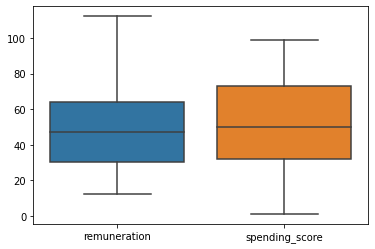

In [50]:
# Quick check with box plot to see data point
sns.boxplot(data=df2[['remuneration','spending_score']])

## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

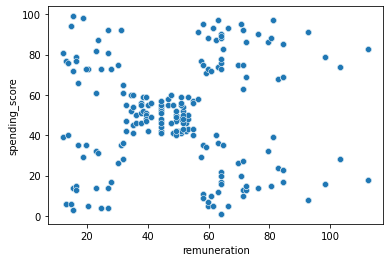

In [51]:
# Create a scatterplot with Seaborn.
sns.scatterplot(data=df2, x='remuneration', y='spending_score')

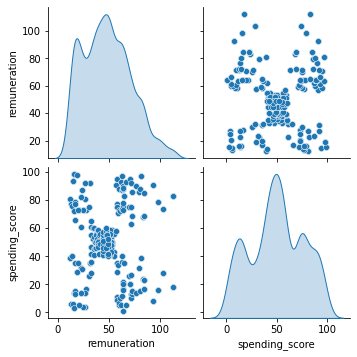

In [52]:
# Create a pairplot with Seaborn.
x=df2[['remuneration', 'spending_score']]
sns.pairplot(data=df2, vars=x, diag_kind= 'kde')

## 3. Elbow and silhoutte methods

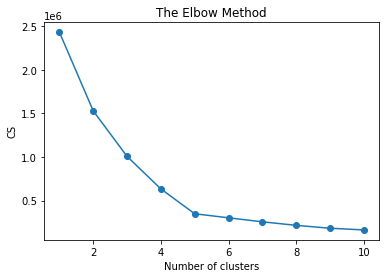

In [53]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
   
plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

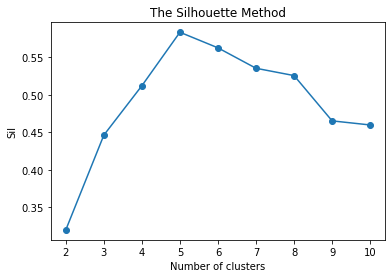

In [54]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

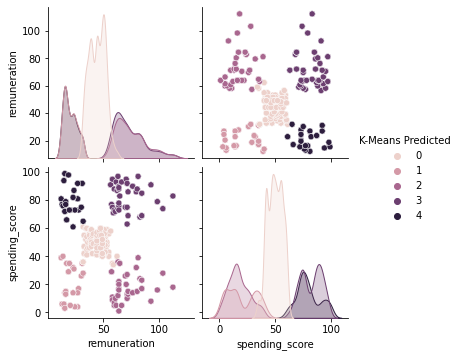

In [55]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

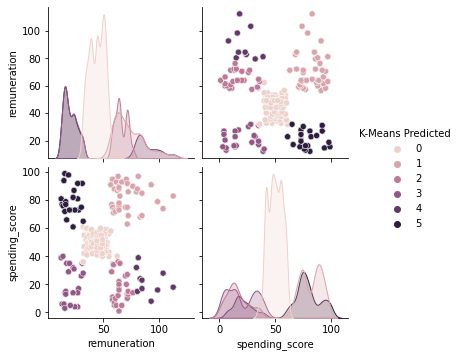

In [56]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

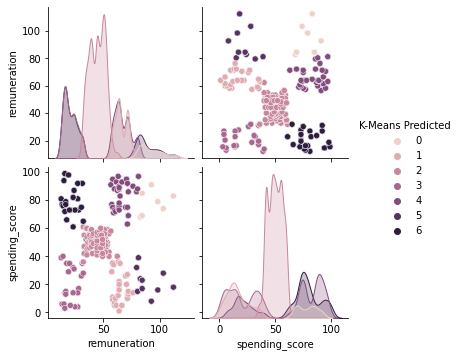

In [57]:
# Use 7 clusters:
kmeans = KMeans(n_clusters = 7, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

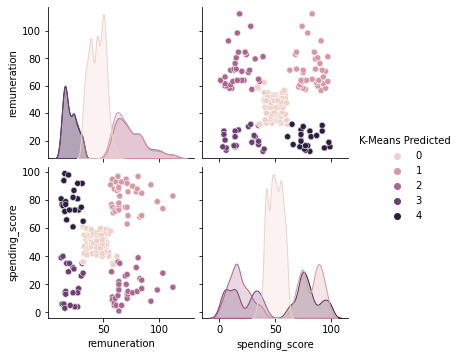

In [58]:
# Apply the final model.
# The shape of the data very suitable for matrix type of clustering. Therefore decided to move forward with 5 cluster.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [59]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
1    356
2    330
3    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  4
2         13.12               6                  3
3         13.12              77                  4
4         13.94              40                  3

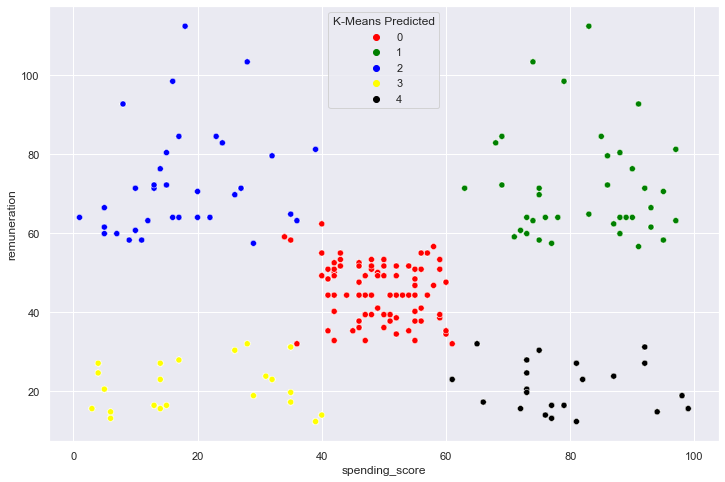

In [60]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(y='remuneration' , 
                x ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'black'])

# View the DataFrame.
x.head()

In [61]:
# Replace K-means predicted values with better explanations
x['K-Means Predicted'] = x['K-Means Predicted'].replace(0,'AveSpending_and_AveRemuneration')
x['K-Means Predicted'] = x['K-Means Predicted'].replace(1,'HighSpending_and_HighRemuneration')
x['K-Means Predicted'] = x['K-Means Predicted'].replace(2,'LowSpending_and_HighRemuneration')
x['K-Means Predicted'] = x['K-Means Predicted'].replace(3,'LowSpending_and_LowRemuneration')
x['K-Means Predicted'] = x['K-Means Predicted'].replace(4,'HighSpending_and_LowRemuneration')

In [62]:
# Check the size of customer groups.
x['K-Means Predicted'].value_counts()

AveSpending_and_AveRemuneration      774
HighSpending_and_HighRemuneration    356
LowSpending_and_HighRemuneration     330
LowSpending_and_LowRemuneration      271
HighSpending_and_LowRemuneration     269
Name: K-Means Predicted, dtype: int64

In [63]:
# Check the df before merge with product ids
x.head()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   remuneration       2000 non-null   float64
 1   spending_score     2000 non-null   int64  
 2   K-Means Predicted  2000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [64]:
# Group by the customer segments to check the size, remuneration and spending
x.groupby('K-Means Predicted').agg(['count','mean'])

remuneration            spending_score  \
                                         count       mean          count   
K-Means Predicted                                                          
AveSpending_and_AveRemuneration            774  44.418786            774   
HighSpending_and_HighRemuneration          356  73.240281            356   
HighSpending_and_LowRemuneration           269  20.353680            269   
LowSpending_and_HighRemuneration           330  74.831212            330   
LowSpending_and_LowRemuneration            271  20.424354            271   

                                              
                                        mean  
K-Means Predicted                             
AveSpending_and_AveRemuneration    49.529716  
HighSpending_and_HighRemuneration  82.008427  
HighSpending_and_LowRemuneration   79.416357  
LowSpending_and_HighRemuneration   17.424242  
LowSpending_and_LowRemuneration    19.763838

In [65]:
# Bring Product ids into this df for possible future analysis
df2_clusters = df2.merge(x, on=['remuneration', 'spending_score'], how='inner')

In [66]:
# View dataframe to see changes
df2_clusters.head()
df2_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21684 entries, 0 to 21683
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   remuneration       21684 non-null  float64
 1   spending_score     21684 non-null  int64  
 2   product            21684 non-null  object 
 3   K-Means Predicted  21684 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 847.0+ KB


In [67]:
# Data size got bigger.
# It should be due to duplicated rows.
# Explore df2 for duplicated rows
# There is 213 duplicated rows.
df2[df2.duplicated()==True]

remuneration  spending_score product
248          32.80              42    2114
400          12.30              39     466
401          12.30              81     254
402          13.12               6     263
403          13.12              77     291
...            ...             ...     ...
1407         16.40              13    2261
1977         18.86              98     977
1978         19.68              35     979
1979         19.68              73    1012
1980         20.50               5    1031

[213 rows x 3 columns]

In [68]:
# Rename the columns
df2_clusters=df2_clusters.rename(columns={'remuneration':'Remuneration', 'spending_score':'Spending_Score','K-Means Predicted' : 'Customer_Segments', 'product':'Product'})

In [69]:
# Data size enlarged. 
# Check for duplicated values.
df2_clusters[df2_clusters.duplicated()==True]

Remuneration  Spending_Score Product                  Customer_Segments
1             12.30              39     453    LowSpending_and_LowRemuneration
2             12.30              39     453    LowSpending_and_LowRemuneration
3             12.30              39     453    LowSpending_and_LowRemuneration
4             12.30              39     453    LowSpending_and_LowRemuneration
5             12.30              39     453    LowSpending_and_LowRemuneration
...             ...             ...     ...                                ...
21679        112.34              83    3478  HighSpending_and_HighRemuneration
21680        112.34              83    3478  HighSpending_and_HighRemuneration
21681        112.34              83    3478  HighSpending_and_HighRemuneration
21682        112.34              83    3478  HighSpending_and_HighRemuneration
21683        112.34              83    3478  HighSpending_and_HighRemuneration

[19897 rows x 4 columns]

In [70]:
# Remove duplicated values
df2_clusters = df2_clusters.drop_duplicates(subset=None)
df2_clusters.reset_index(inplace=True)

In [71]:
# Check data types
df2_clusters.dtypes

index                  int64
Remuneration         float64
Spending_Score         int64
Product               object
Customer_Segments     object
dtype: object

In [72]:
# Check customer segments
df2_clusters[['Customer_Segments','Remuneration', 'Spending_Score']].groupby('Customer_Segments').agg(['count','mean'])

Remuneration            Spending_Score  \
                                         count       mean          count   
Customer_Segments                                                          
AveSpending_and_AveRemuneration            690  44.352493            690   
HighSpending_and_HighRemuneration          318  73.642704            318   
HighSpending_and_LowRemuneration           241  20.374108            241   
LowSpending_and_HighRemuneration           295  75.128678            295   
LowSpending_and_LowRemuneration            243  20.439259            243   

                                              
                                        mean  
Customer_Segments                             
AveSpending_and_AveRemuneration    49.547826  
HighSpending_and_HighRemuneration  81.996855  
HighSpending_and_LowRemuneration   79.269710  
LowSpending_and_HighRemuneration   17.461017  
LowSpending_and_LowRemuneration    19.860082

# Check the product ids for min and max selling for certain segments

In [73]:
# AveSpending_and_AveRemuneration
df2_clusters[df2_clusters['Customer_Segments'] == 'AveSpending_and_AveRemuneration'].Product.value_counts()

9530    8
6233    8
4459    8
978     8
9507    8
       ..
3158    1
1175    1
4619    1
3153    1
7381    1
Name: Product, Length: 179, dtype: int64

In [74]:
# HighSpending_and_HighRemuneration
df2_clusters[df2_clusters['Customer_Segments'] == 'HighSpending_and_HighRemuneration'].Product.value_counts().head(20)

8923     5
10241    5
4399     5
10232    5
9080     5
4477     5
2518     5
2795     5
8962     5
6504     5
4415     5
3403     5
2457     5
10281    5
4619     4
4692     4
7573     4
11056    4
4712     4
3153     4
Name: Product, dtype: int64

In [75]:
# HighSpending_and_LowRemuneration
df2_clusters[df2_clusters['Customer_Segments'] == 'HighSpending_and_LowRemuneration'].Product.value_counts()

830      4
2253     4
760      4
618      4
1970     4
        ..
11003    1
1618     1
3112     1
453      1
10232    1
Name: Product, Length: 132, dtype: int64

In [76]:
# LowSpending_and_HighRemuneration
df2_clusters[df2_clusters['Customer_Segments'] == 'LowSpending_and_HighRemuneration'].Product.value_counts()

4390    5
8933    5
6507    5
3112    5
4405    5
       ..
5493    1
1463    1
1497    1
1506    1
3436    1
Name: Product, Length: 114, dtype: int64

In [77]:
# LowSpending_and_LowRemuneration
df2_clusters[df2_clusters['Customer_Segments'] == 'LowSpending_and_LowRemuneration'].Product.value_counts()

1031     5
2793     4
1175     4
1497     4
2173     4
        ..
1577     1
9150     1
283      1
9507     1
10196    1
Name: Product, Length: 131, dtype: int64

## 7. Observations and insights

***Customer groups can be segmented into 5 groups. Data spread in kind of similar to matrix structure. 
Largest group is middle imcome and middle spending families.
High earners and high spenders are the second largest group.
Low earners and low spenders are the smallest customer segment.
In addition, most selling and least selling products are identified for those customer groups for possible further analysis.***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [78]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Load the data set as df3.
df3=pd.read_csv ('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 3/Module 3 Assignment/LSE_DA301_assignment_files/turtle_reviews_clean.csv')

# View DataFrame.
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0           0    Male   18         12.30              39             210   
1           1    Male   23         12.30              81             524   
2           2  Female   22         13.12               6              40   
3           3  Female   25         13.12              77             562   
4           4  Female   33         13.94              40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [80]:
# Keep necessary columns. Drop unnecessary columns.
df3.drop(['Unnamed: 0', 'gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education'], axis=1, inplace=True)

# View DataFrame.
df3.head()

product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [81]:
# Determine if there are any missing values.
df3.isna().sum()

product    0
review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [82]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [83]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [84]:
# View the dataframe to check
df3.head()

product                                             review  \
0      453  when it comes to a dm's screen, the space on t...   
1      466  an open letter to galeforce9*: your unpainted ...   
2      254  nice art, nice printing. why two panels are fi...   
3      263  amazing buy! bought it as a gift for our new d...   
4      291  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [85]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [86]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [87]:
# Check for duplicated rows in review column
df3.review.duplicated().sum()

50

In [88]:
# Check for duplicated rows in summary column
df3.summary.duplicated().sum()

649

In [89]:
df3[['review', 'summary']].duplicated().sum()

39

In [90]:
# View duplicated rows to sensecheck
df3[df3[['review', 'summary']].duplicated()==True]

product                           review     summary
94       6721                            great  five stars
326      2849                          love it  five stars
371      5726                            great  five stars
404       977                             good  five stars
408      1459                            great  five stars
416       830                          love it  five stars
430      2173                          love it  five stars
576      7141                            great  five stars
810      1175                       great game  five stars
811      1183                       great game  five stars
959     11086                          love it  five stars
979      4405                       great game  five stars
1006     1183                       great game  five stars
1013      624                        i love it  five stars
1037     2130                          awesome  five stars
1050      815                       great game  five stars
1145     6271                             nice  five stars
1155     3153             ontime and nice item  five stars
1186     3711                             good  five stars
1322     4477                   best game ever  five stars
1382     1031                          love it  five stars
1414      811  great expansion to a great game  five stars
1441      978       great addition to the game  five stars
1531     4712                             cute  five stars
1540    11084                          love it  five stars
1544     3267                            great  five stars
1545     3277                        very cute  five stars
1553     6431                      as expected  five stars
1577     1506                     awesome game  five stars
1651     4452                      as expected  five stars
1713     7533                       love these  five stars
1849     1577                     good product  five stars
1863     6694                       great game  five stars
1897     8235                great family game  five stars
1926     4673                         fun game  five stars
1933    10995                             good  five stars
1938    11084                        good game  five stars
1949     7141                       great game  five stars
1972      453                               ok  five stars

In [91]:
# Check for duplicated rows in both columns
df3.duplicated().sum()

1

In [92]:
# View duplicated rows to sensecheck
df3[df3.duplicated()==True]

product      review     summary
1006     1183  great game  five stars

In [93]:
# Drop duplicates
df3 = df3.drop_duplicates(subset=None)
df3.reset_index(inplace=True)

# View DataFrame.
print(df3.shape)
df3.head()

(1999, 4)


index  product                                             review  \
0      0      453  when it comes to a dms screen the space on the...   
1      1      466  an open letter to galeforce9 your unpainted mi...   
2      2      254  nice art nice printing why two panels are fill...   
3      3      263  amazing buy bought it as a gift for our new dm...   
4      4      291  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

## 3. Tokenise and create wordclouds

In [94]:
# Create new DataFrame (copy DataFrame).
df3_wordcloud = df3.copy()

# View DataFrame.
df3_wordcloud.head()

index  product                                             review  \
0      0      453  when it comes to a dms screen the space on the...   
1      1      466  an open letter to galeforce9 your unpainted mi...   
2      2      254  nice art nice printing why two panels are fill...   
3      3      263  amazing buy bought it as a gift for our new dm...   
4      4      291  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [95]:
# Apply tokenisation to column review.
df3_wordcloud['review']=df3_wordcloud['review'].apply(word_tokenize)

# View DataFrame.
df3_wordcloud['review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review, dtype: object

In [96]:
# Define an empty list of review tokens.
reviewtoken_list = []

for i in range(df3_wordcloud.shape[0]):
    reviewtoken_list = reviewtoken_list + df3_wordcloud['review'][i]

# String all the reviews together in a single variable.
reviewtoken_str = ''
for word in reviewtoken_list :
    reviewtoken_str = reviewtoken_str + word + ' '

In [97]:
# View the string to sensecheck working corrrect
print(reviewtoken_str)

when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could h

In [98]:
# Review: Create a word cloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                stopwords = 'none',   # if I remove this line wordcloud filters stopwords automatically
                min_font_size = 10).generate(reviewtoken_str) 

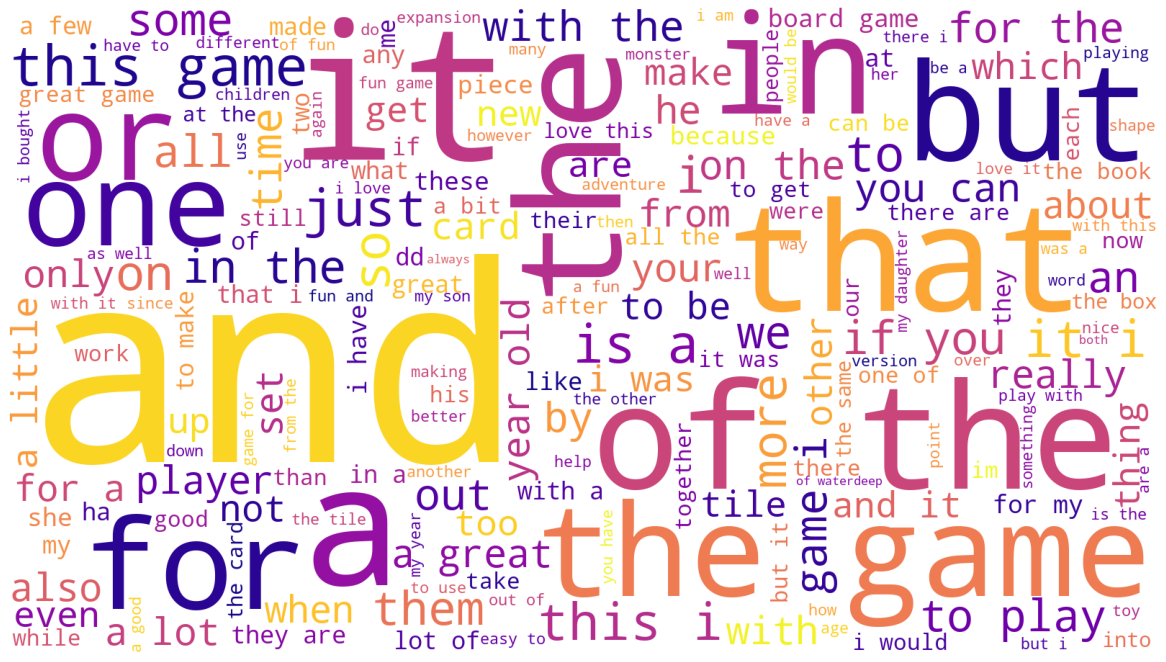

In [99]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [100]:
# Review: Create a word cloud v2 without stopwords = 'none'syntax
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(reviewtoken_str) 

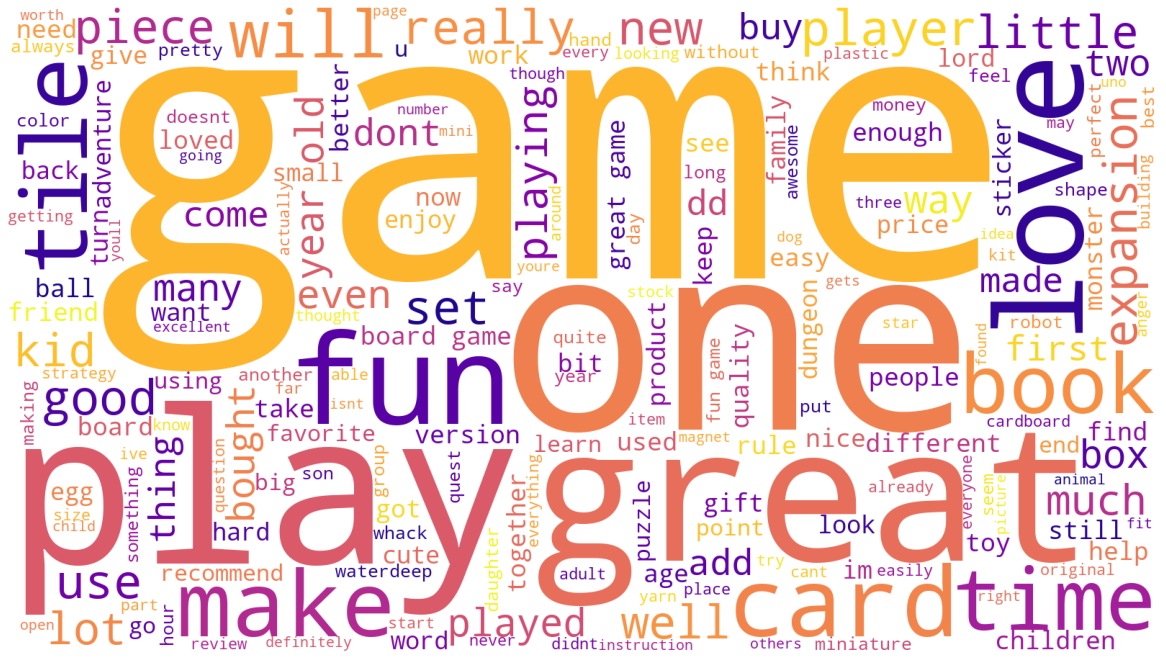

In [101]:
# Review: Plot the v2 WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [102]:
# Apply tokenisation to column summary.
df3_wordcloud['summary']=df3_wordcloud['summary'].apply(word_tokenize)

# View DataFrame.
df3_wordcloud['summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary, dtype: object

In [103]:
# Define an empty list of summary tokens.
summarytoken_list = []

for i in range(df3_wordcloud.shape[0]):
    summarytoken_list = summarytoken_list + df3_wordcloud['summary'][i]

# String all the reviews together in a single variable.
summarytoken_str = ''
for word in summarytoken_list :
    summarytoken_str = summarytoken_str + word + ' '

In [104]:
# View the string to sensecheck working corrrect
print(reviewtoken_str)

when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could h

In [105]:
# Summary: Create a word cloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                stopwords = 'none',   # if get rid of this wordcloud filters stopwords automatically
                min_font_size = 10).generate(summarytoken_str) 

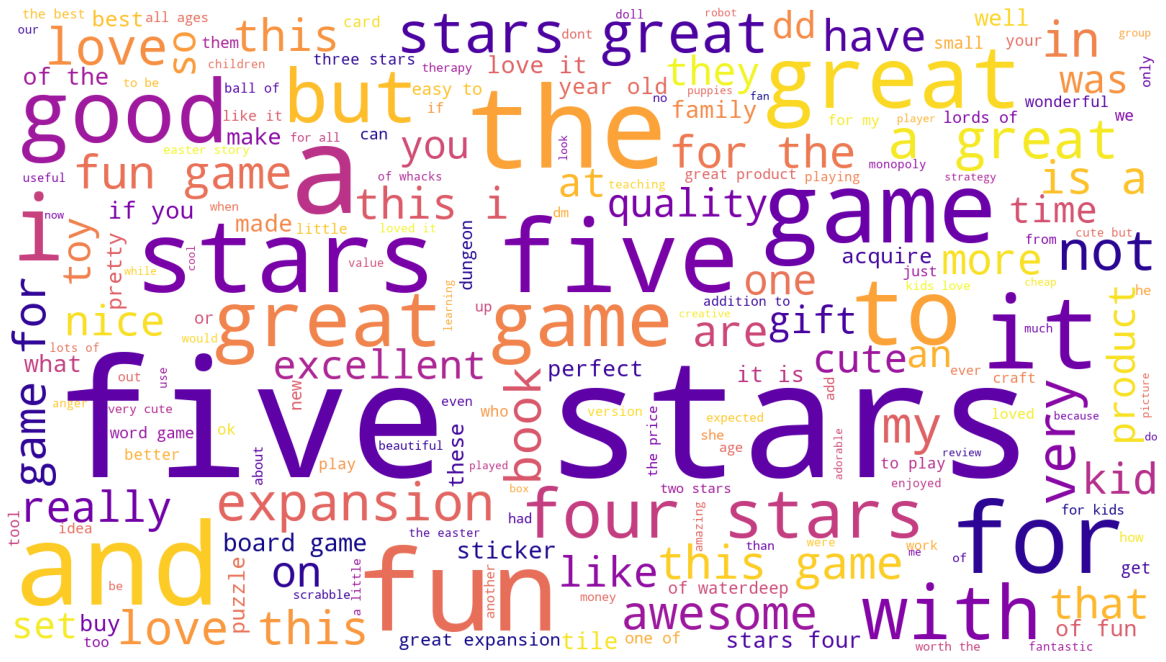

In [106]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [107]:
# Summary: Create a word cloud v2 without stopwords = 'none'syntax
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summarytoken_str) 

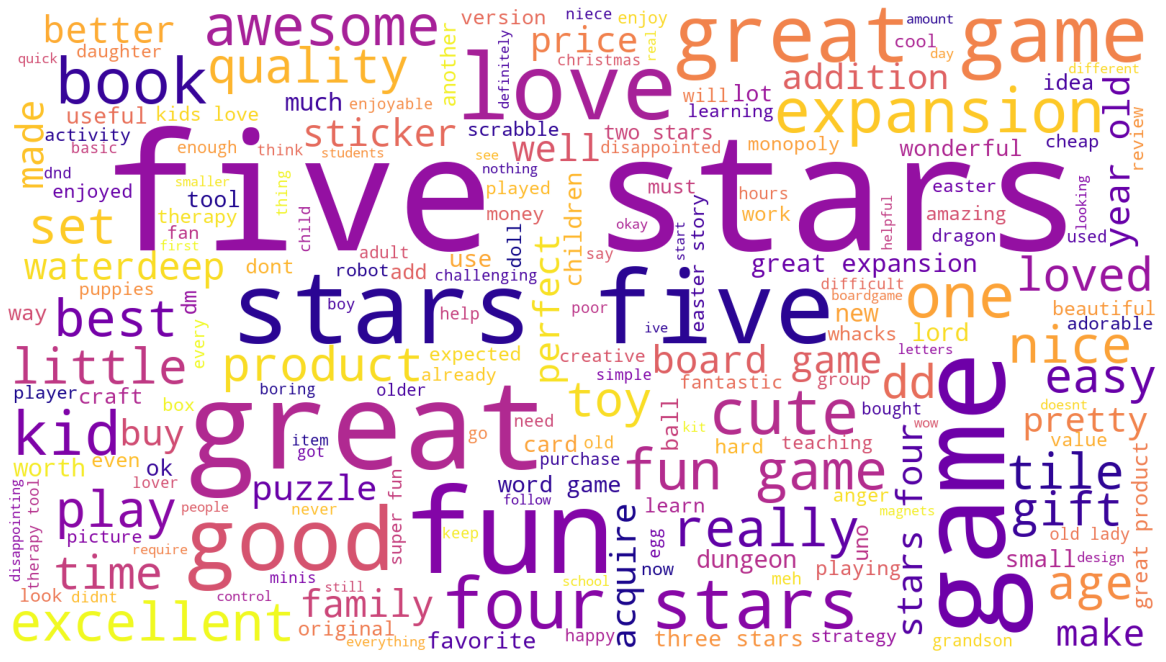

In [108]:
# Summary: Plot the v2 WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [109]:
# Determine the frequency distribution for reviews
fdist_reviews = FreqDist(reviewtoken_list)

# Preview data.d
fdist_reviews

FreqDist({'the': 5452, 'and': 3234, 'to': 3164, 'a': 3161, 'of': 2488, 'i': 2091, 'it': 2090, 'is': 1782, 'this': 1776, 'game': 1684, ...})

In [110]:
# Determine the frequency distribution for summary
fdist_summary = FreqDist(summarytoken_list)

# Preview data.
fdist_summary

FreqDist({'stars': 465, 'five': 380, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

Lots of stopword especially in reviews list.

### 4b) Remove alphanumeric characters and stopwords

In [111]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers
# isalnum() returns true then it means it is alphabets or numbers and add into list

summarytoken_list2 = [word for word in summarytoken_list if word.isalnum()]
reviewtoken_list2 = [word for word in reviewtoken_list if word.isalnum()]

In [112]:
# Remove all the stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
summarytoken_list3 = [x for x in summarytoken_list2 if x.lower() not in english_stopwords]
reviewtoken_list3 = [x for x in reviewtoken_list2 if x.lower() not in english_stopwords]

# Define an empty string variable that is required for word cloud
summarytoken_str2 = ''
reviewtoken_str2 = ''

for word in summarytoken_list3:
    # Add each filtered token word to the string.
    summarytoken_str2 = summarytoken_str2 + word + ' '
    
for word in reviewtoken_list3:
    # Add each filtered token word to the string.
    reviewtoken_str2 = reviewtoken_str2 + word + ' '

### 4c) Create wordcloud without stopwords

In [113]:
# Create a wordcloud without stop words. Summary (without stopwords and Alpanum)
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summarytoken_str2) 

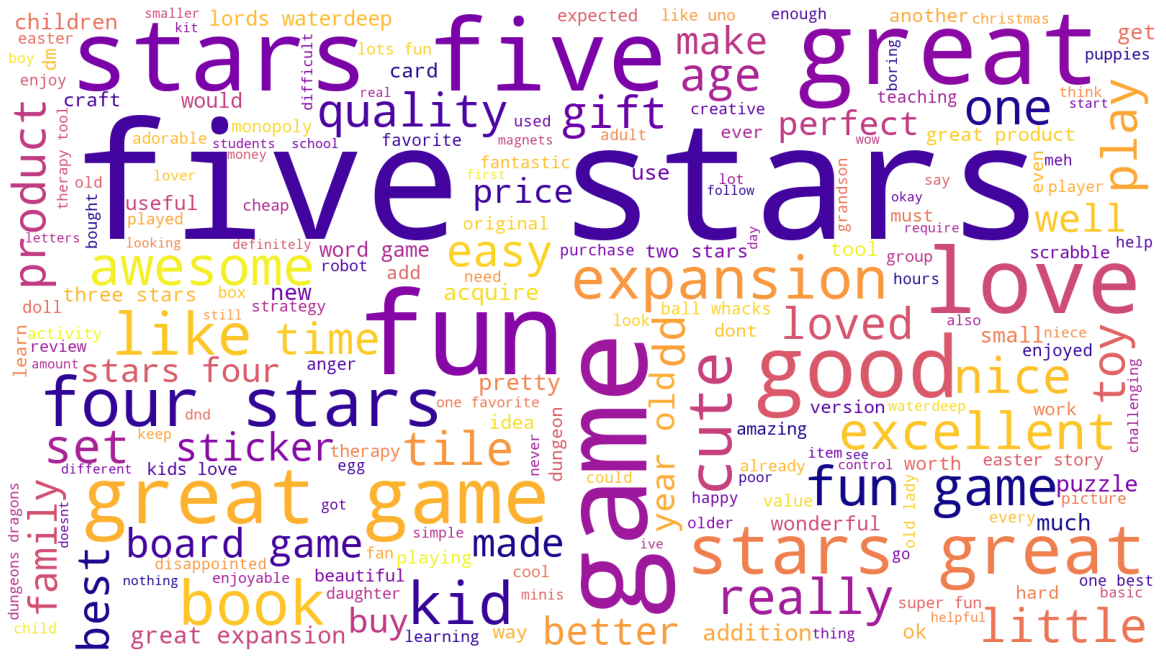

In [114]:
# Plot the wordcloud image. Summary (without stopwords and Alpanum)
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [115]:
# Create a wordcloud without stop words. Review (without stopwords and Alpanum)
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(reviewtoken_str2) 

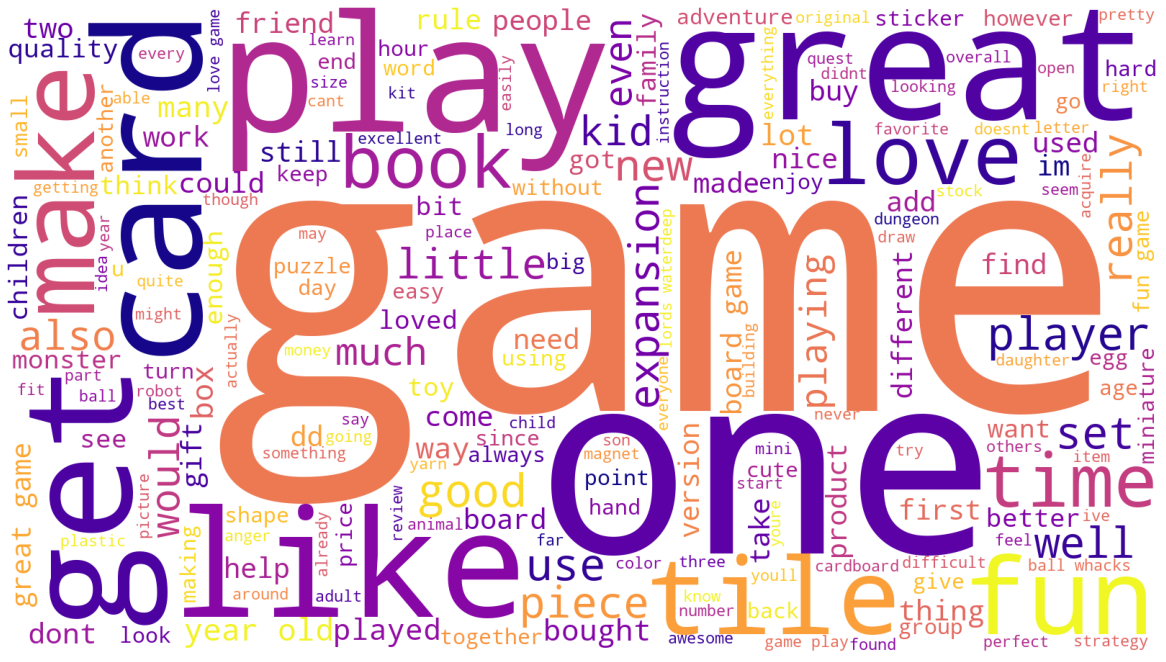

In [116]:
# Plot the wordcloud image. Review (without stopwords and Alpanum)
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [117]:
# Determine the 15 most common words in reviews
# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(reviewtoken_list3).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

Frequency
Word             
game         1684
great         595
fun           553
one           530
play          502
like          414
love          331
really        319
get           319
cards         301
tiles         297
good          294
time          291
would         280
book          273

In [118]:
# Determine the 15 most common words in summary
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(summarytoken_list3).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

Frequency
Word                
stars            465
five             380
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [119]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [120]:
# Determine polarity of both columns. 
df3['review_polarity']=df3['review'].apply(generate_polarity)
df3['summary_polarity']=df3['summary'].apply(generate_polarity)

# View output.
df3.head()

index  product                                             review  \
0      0      453  when it comes to a dms screen the space on the...   
1      1      466  an open letter to galeforce9 your unpainted mi...   
2      2      254  nice art nice printing why two panels are fill...   
3      3      263  amazing buy bought it as a gift for our new dm...   
4      4      291  as my review of gf9s previous screens these we...   

                                             summary  review_polarity  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   summary_polarity  
0              0.15  
1             -0.80  
2              0.00  
3              0.00  
4              0.00

In [121]:
# Determine compound polarity for review and summary using summary statistics
df3[['review_polarity', 'summary_polarity']].describe()

review_polarity  summary_polarity
count      1999.000000       1999.000000
mean          0.217697          0.219426
std           0.262567          0.335675
min          -1.000000         -1.000000
25%           0.049777          0.000000
50%           0.182179          0.062500
75%           0.361056          0.452500
max           1.000000          1.000000

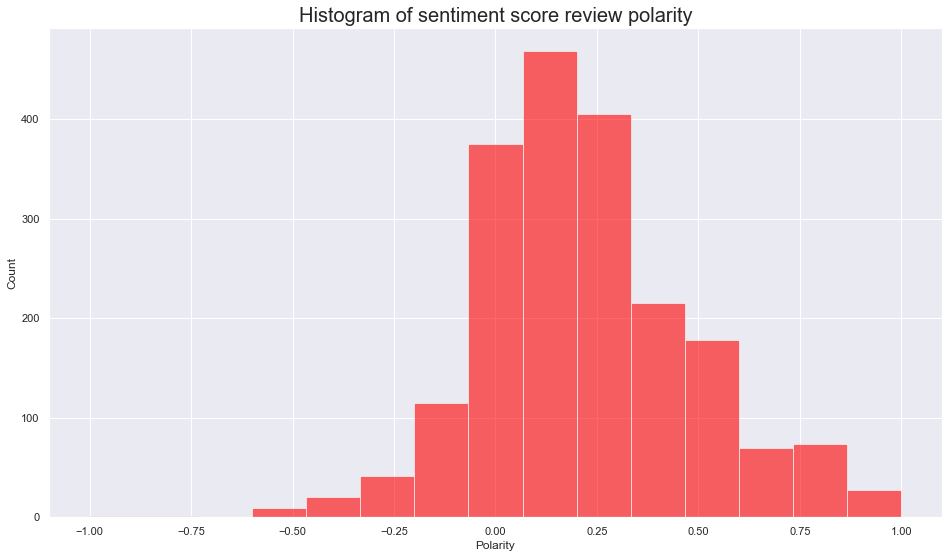

In [122]:
# Review: Create a histogram plot with bins = 15.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score review polarity', fontsize=20)

plt.show()

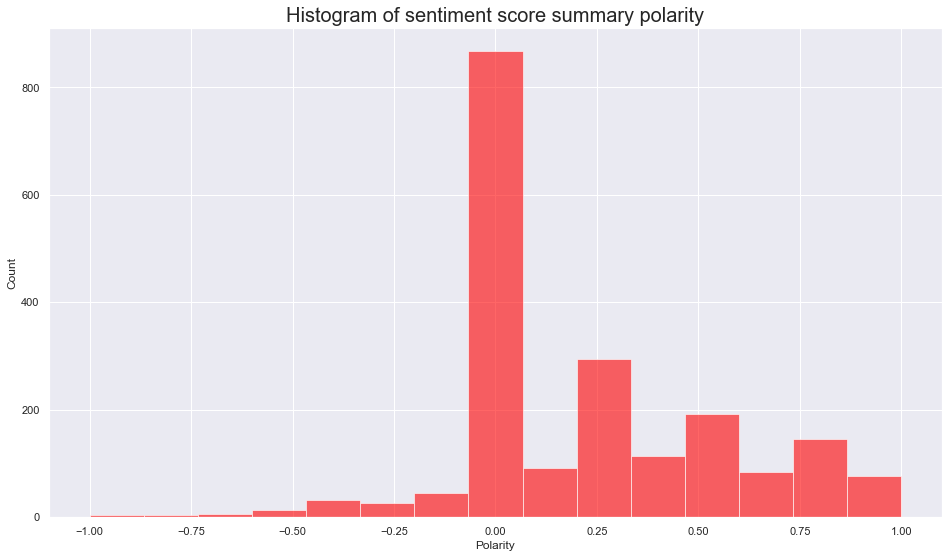

In [123]:
# Summary: Create a histogram plot with bins = 15.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score summary polarity', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [124]:
# Top 20 negative reviews.
negative_sentiment_review = df3.nsmallest(20, 'review_polarity')
negative_sentiment_review = negative_sentiment_review[['review', 'review_polarity']]

# View output.
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

In [125]:
# Top 20 negative summaries.
negative_sentiment_summary = df3.nsmallest(20, 'summary_polarity')
negative_sentiment_summary = negative_sentiment_summary[['summary', 'summary_polarity']]

# View output.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [126]:
# Top 20 positive reviews.
positive_sentiment_review = df3.nlargest(20, 'review_polarity')
positive_sentiment_review = positive_sentiment_review[['review', 'review_polarity']]

# View output.
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

In [127]:
# Top 20 positive summaries.
positive_sentiment_summary = df3.nlargest(20, 'summary_polarity')
positive_sentiment_summary = positive_sentiment_summary[['summary', 'summary_polarity']]

# View output.
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

## Further Analysis:  Clustering based on Polarity

In [128]:
# Load the CSV file(s) as df4.
df3.drop('index', axis=1, inplace=True)
df4=df3.copy()

# View DataFrame.
df4.head()

product                                             review  \
0      453  when it comes to a dms screen the space on the...   
1      466  an open letter to galeforce9 your unpainted mi...   
2      254  nice art nice printing why two panels are fill...   
3      263  amazing buy bought it as a gift for our new dm...   
4      291  as my review of gf9s previous screens these we...   

                                             summary  review_polarity  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   summary_polarity  
0              0.15  
1             -0.80  
2              0.00  
3              0.00  
4              0.00

<AxesSubplot:xlabel='summary_polarity', ylabel='review_polarity'>

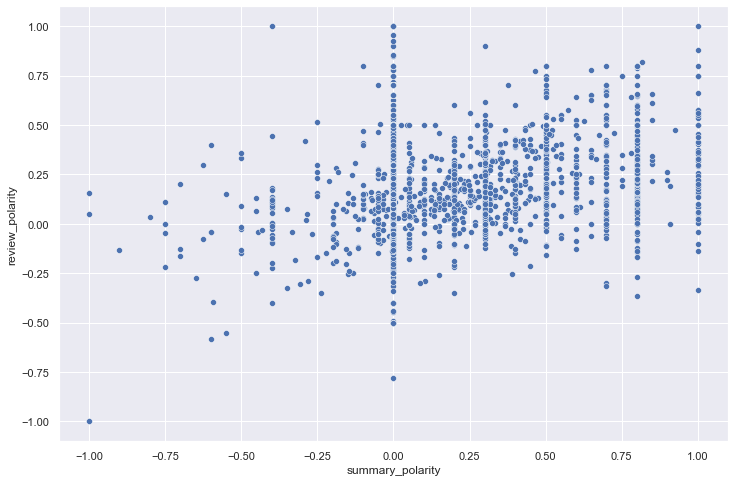

In [129]:
# View polarity of summary and reviews in scatter plot
sns.scatterplot(data=df4, x='summary_polarity', y='review_polarity')

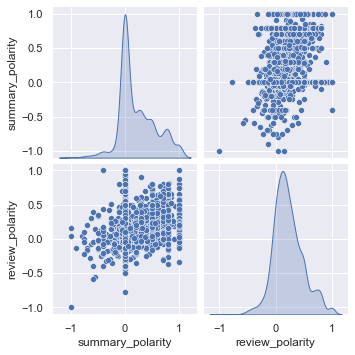

In [130]:
# Create a pairplot with Seaborn.
x=df4[['summary_polarity', 'review_polarity']]
sns.pairplot(data=df4, vars=x, diag_kind= 'kde')

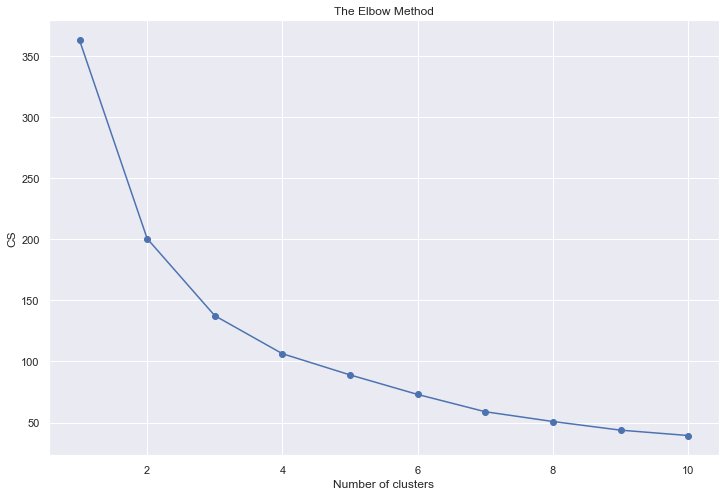

In [131]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
   
plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

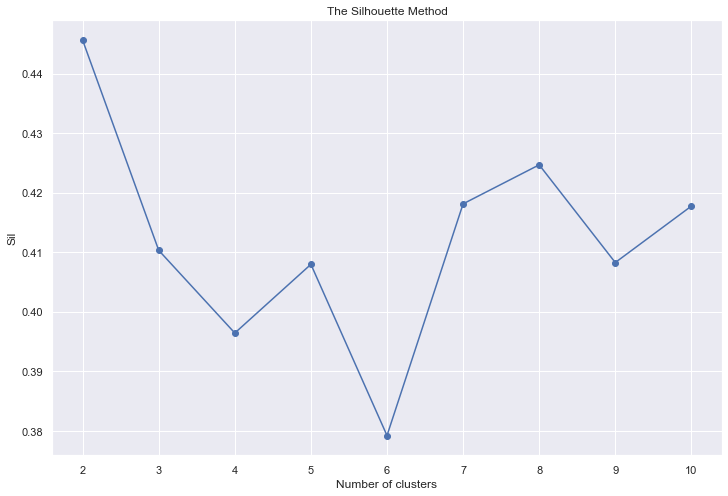

In [132]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

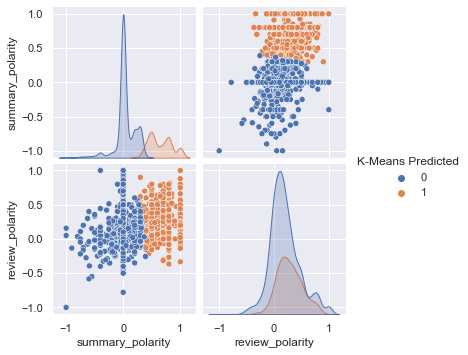

In [133]:
# Use 2 clusters:
kmeans = KMeans(n_clusters = 2, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

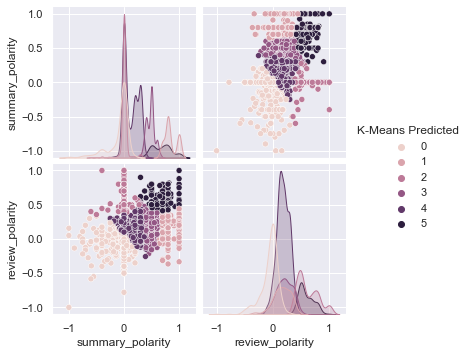

In [134]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

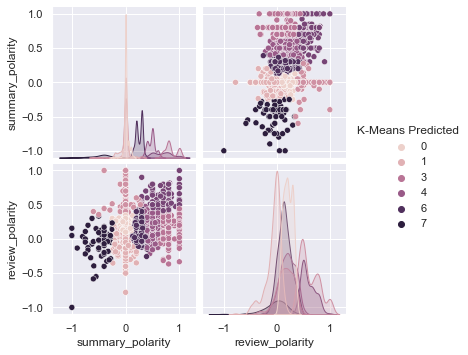

In [135]:
# Use 8 clusters:
kmeans = KMeans(n_clusters = 8, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [136]:
# Groupby products to correctly assign polarity for each product (average)
df5 = df4.groupby('product').mean()

In [137]:
# View the dataframe
df5.reset_index(inplace=True)
df5

product  review_polarity  summary_polarity
0        107         0.115536          0.087917
1        123         0.170614          0.035000
2        195         0.249792          0.091667
3        231         0.076851          0.097222
4        249         0.235143          0.348402
..       ...              ...               ...
195    11004         0.405735          0.373333
196    11025         0.311796          0.182917
197    11056         0.181972         -0.030000
198    11084         0.244261          0.305625
199    11086         0.364693          0.250758

[200 rows x 3 columns]

In [138]:
# Rename columns for merging purposes with previous dataframe
df5=df5.rename(columns={'product':'Product', 'review_polarity':'Review_Polarity','summary_polarity' : 'Summary_Polarity'})

In [139]:
# Merge with previous dataframe and view
df_final = df2_clusters.merge(df5, on=['Product'])
df_final

index  Remuneration  Spending_Score Product  \
0         0         12.30              39     453   
1       430         13.12               6     453   
2      2469         16.40              77     453   
3      2679         16.40              13     453   
4     19841         84.46              17     453   
...     ...           ...             ...     ...   
1782  18573         76.26              14    4390   
1783  18859         79.54              86    4390   
1784  19200         81.18              39    4390   
1785  19310         81.18              97    4390   
1786  19519         82.82              24    4390   

                      Customer_Segments  Review_Polarity  Summary_Polarity  
0       LowSpending_and_LowRemuneration         0.175155          0.250000  
1       LowSpending_and_LowRemuneration         0.175155          0.250000  
2      HighSpending_and_LowRemuneration         0.175155          0.250000  
3       LowSpending_and_LowRemuneration         0.175155          0.250000  
4      LowSpending_and_HighRemuneration         0.175155          0.250000  
...                                 ...              ...               ...  
1782   LowSpending_and_HighRemuneration         0.190625          0.131488  
1783  HighSpending_and_HighRemuneration         0.190625          0.131488  
1784   LowSpending_and_HighRemuneration         0.190625          0.131488  
1785  HighSpending_and_HighRemuneration         0.190625          0.131488  
1786   LowSpending_and_HighRemuneration         0.190625          0.131488  

[1787 rows x 7 columns]

In [140]:
# Drop index column
df_final=df_final.drop(['index'], axis=1)
df_final.head()

Remuneration  Spending_Score Product                 Customer_Segments  \
0         12.30              39     453   LowSpending_and_LowRemuneration   
1         13.12               6     453   LowSpending_and_LowRemuneration   
2         16.40              77     453  HighSpending_and_LowRemuneration   
3         16.40              13     453   LowSpending_and_LowRemuneration   
4         84.46              17     453  LowSpending_and_HighRemuneration   

   Review_Polarity  Summary_Polarity  
0         0.175155              0.25  
1         0.175155              0.25  
2         0.175155              0.25  
3         0.175155              0.25  
4         0.175155              0.25

In [141]:
# Create a CSV file as output.
df_final.to_csv('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 3/Module 3 Assignment/LSE_DA301_assignment_files/review_df_final.csv')

In [142]:
# Check polarity on different customer groups
df_final.groupby('Customer_Segments').mean()

Remuneration  Spending_Score  \
Customer_Segments                                                 
AveSpending_and_AveRemuneration       44.352493       49.547826   
HighSpending_and_HighRemuneration     73.642704       81.996855   
HighSpending_and_LowRemuneration      20.374108       79.269710   
LowSpending_and_HighRemuneration      75.128678       17.461017   
LowSpending_and_LowRemuneration       20.439259       19.860082   

                                   Review_Polarity  Summary_Polarity  
Customer_Segments                                                     
AveSpending_and_AveRemuneration           0.203867          0.225120  
HighSpending_and_HighRemuneration         0.233082          0.219954  
HighSpending_and_LowRemuneration          0.219407          0.209188  
LowSpending_and_HighRemuneration          0.235406          0.221597  
LowSpending_and_LowRemuneration           0.215330          0.210670

## 7. Discuss: Insights and observations

***
In general sentiment over summary and reviews are positive. We can see them from polarity scores and also have general sense by the word cloud.
***
Sentiment analysis seems to be working well. When I check the positive and negative top 20 reviews/summaries assigned polarity is consistent with the meaning with few exceptions.
***
In the analysis, once we do not include product id column in analysis, there seems to be 39 duplicated rows. When I check the duplicated rows, they are usually short answers showing positive sentiment. That may not mean that it is data quality, more like shows how people express positive sentiment with same words.
When I include product id in my analysis there is only one duplicated row. I removed that one and conducted analysis accordingly.
***
Later, I try to come up with meaningful clusters based on polarity. My expectation was grouping them as perfect positive sentiment on summary+review, perfect negative sentiment on summary+review etc. Elbow and silhouette  method favors 2 clusters most. However, it does not make sense to group neutral sentiments with negative. Even I increase clusters to 6/8, the grouping does not seem to be meaningful for me. Therefore I stopped clustering analysis here. 
***
Lastly, I merged my dataframe from week 2 and week 3 to check whether different customer segments have different sentiment polarity. It seems like they are not much different than eachother. As further analysis, sentiment analysis can be check for different products (top 5 bottom 5 purchased goods for those specific customer groups)
***

# 